In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series):
    plt.figure(figsize=(10,6))
    plt.plot(time, series)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)
    plt.show()
    
def trend(time, slope=0):
    return slope*time

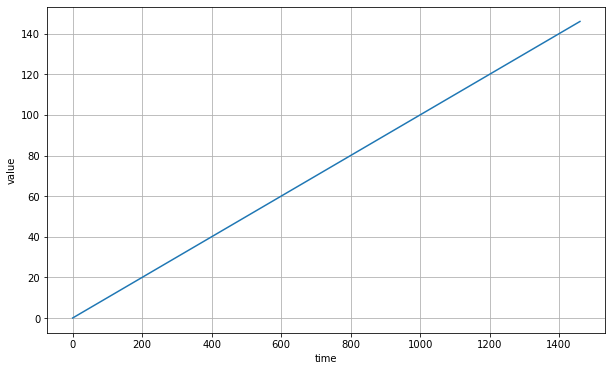

In [4]:
time = np.arange(4*365+1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)

In [7]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

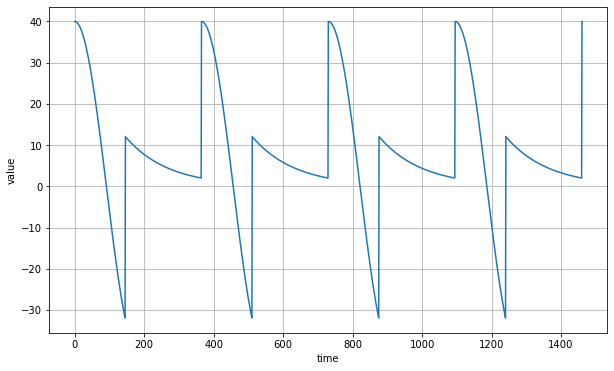

In [8]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

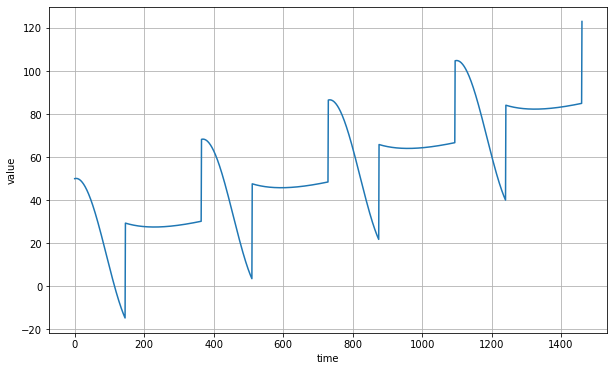

In [9]:
slope = 0.05
series = baseline + trend(time, slope)+seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

In [10]:
def noise(time, noise_level=1):
    return np.random.randn(len(time))*noise_level

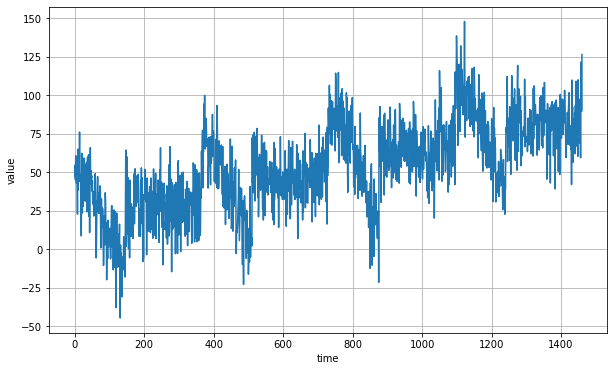

In [11]:
noise_level = 15
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

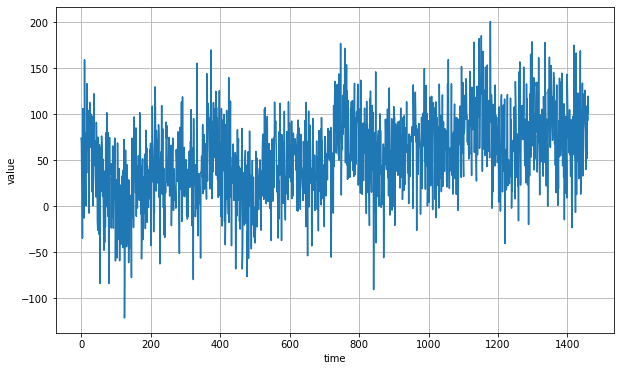

In [14]:
noise_level = 40
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

In [15]:
def autocorrelation(time, amplitude):
    rho1 = 0.5
    rho2 = -0.1
    ar = np.random.randn(len(time)+50)
    ar[:50] = 100
    for step in range(50, len(time)+50):
        ar[step] += rho1*ar[step-50]
        ar[step] += rho2*ar[step-33]
    return ar[50:]*amplitude

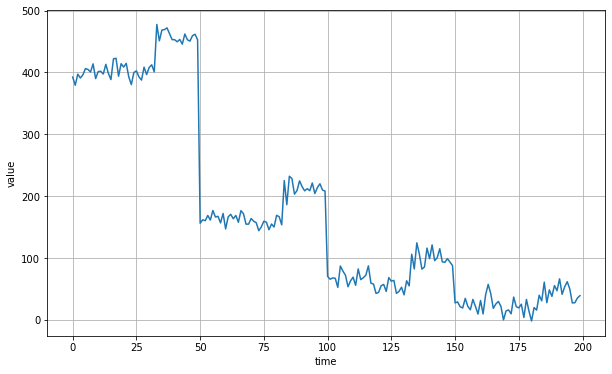

In [17]:
series = autocorrelation(time, 10)
plot_series(time[:200], series[:200])

In [18]:
def autocorrelation(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time)+1)
    for step in range(1, len(time)+1):
        ar[step]+=rho*ar[step-1]
    return ar[1:]*amplitude

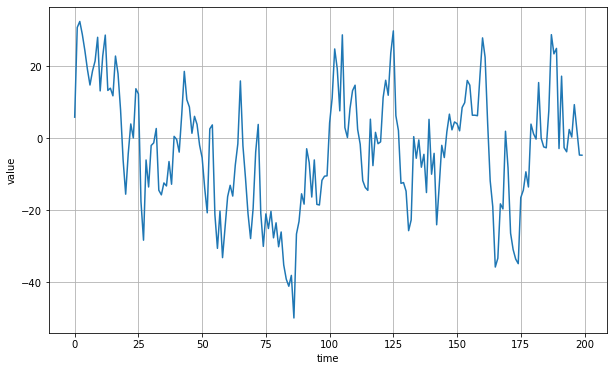

In [19]:
series = autocorrelation(time, 10)
plot_series(time[:200], series[:200])

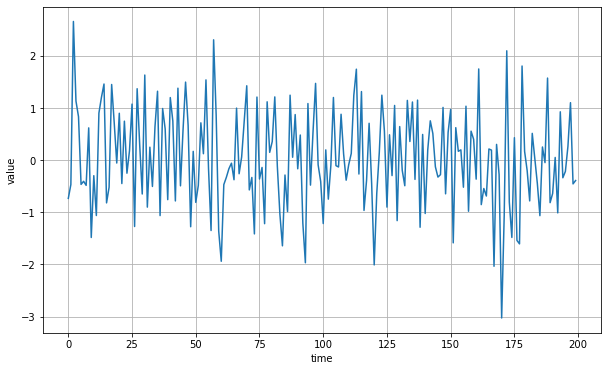

In [20]:
series = noise(time)
plot_series(time[:200], series[:200])

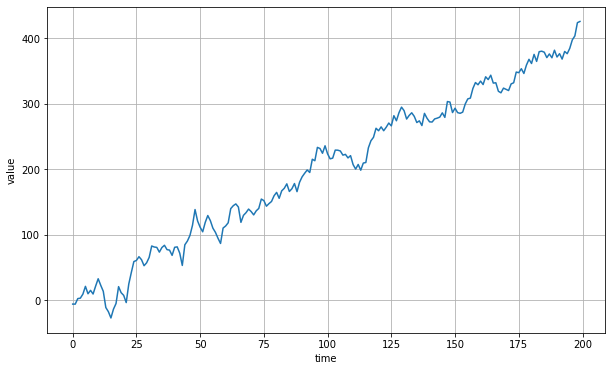

In [23]:
series = autocorrelation(time, 10) + trend(time, 2)
plot_series(time[:200], series[:200])

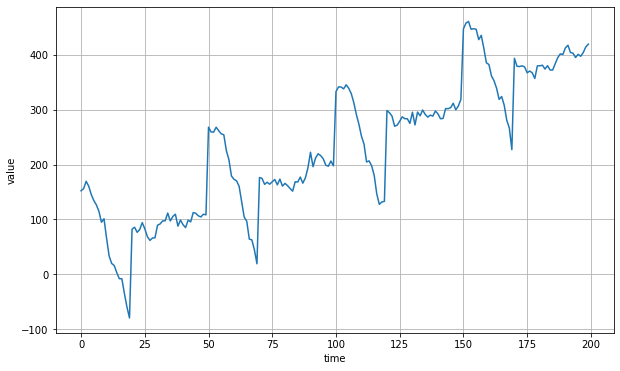

In [24]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

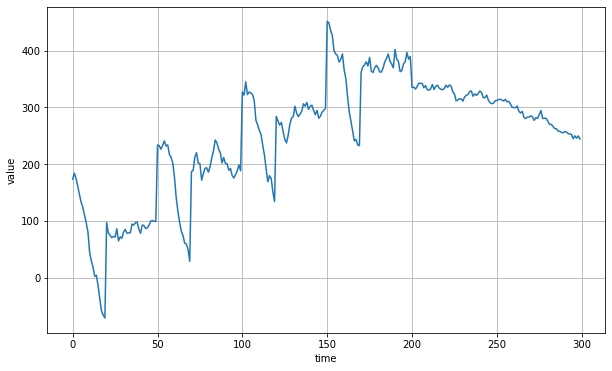

In [25]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])